In [62]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [17]:
df=pd.read_csv('D:\PycharmProjects\pythonProject\spider_engine1\out.csv')

In [18]:
df.rename(columns=lambda x: x.replace(".","_"), inplace=True)

In [19]:
df.item_brand_name.unique()

array(['BMW', 'Volvo', 'Honda', 'Volkswagen', 'Suzuki', 'Subaru',
       'Peugeot', 'Mitsubishi', 'MINI', 'Mazda', 'Lexus', 'Land Rover',
       'Lamborghini', 'Kia', 'Isuzu', 'Hyundai', 'Ford', 'Ferrari',
       'Chevrolet', 'Audi', 'Toyota', 'Proton', 'Porsche', 'Perodua',
       'Nissan', 'Mercedes-Benz', 'Austin', 'Alfa Romeo', 'Aston Martin',
       'Bentley', 'Bison', 'Bufori', 'Borgward', 'Cadillac', 'Changan',
       'Chana', 'CAM', 'Chery', 'Chrysler', 'Citroen', 'Daihatsu',
       'Farid', 'Foton', 'Fiat', 'Great Wall', 'Hicom', 'Haval', 'Hino',
       'Hummer', 'Impul', 'Infiniti', 'Inokom', 'Jaguar', 'JBC', 'Jeep',
       'King Long', 'LMG', 'JMC', 'Mahindra', 'Lotus', 'Kubota',
       'Maserati', 'Maxus', 'McLaren', 'MG', 'Mercedes-Maybach',
       'Mitsuoka', 'Naza', 'Renault', 'Rover', 'Rolls-Royce',
       'Shenyang Brilliance', 'Smart', 'Skoda', 'TESLA', 'TD2000',
       'ZX Auto', 'Wald', 'Ssangyong', 'ZNA'], dtype=object)

In [20]:
df.item_url.nunique()

89608

In [21]:
df.describe()

,Unnamed: 0,position,item_offers_price
count,89608.000000,89608.000000,8.960800e+04
mean,44804.500000,12.959613,7.638480e+04
std,25867.745798,7.214821,1.076482e+05
min,1.000000,1.000000,2.000000e+03
25%,22402.750000,7.000000,2.880000e+04
50%,44804.500000,13.000000,4.899000e+04
75%,67206.250000,19.000000,8.680000e+04
max,89608.000000,26.000000,2.699000e+06


In [22]:
df.columns

Index(['Unnamed: 0', 'type', 'position', 'item_type', 'item_additionalType',
       'item_brand_type', 'item_brand_name', 'item_model', 'item_bodyType',
       'item_fuelType', 'item_seatingCapacity', 'item_color', 'item_name',
       'item_mainEntityOfPage', 'item_url', 'item_image', 'item_description',
       'item_offers_type', 'item_offers_price', 'item_offers_priceCurrency',
       'item_offers_itemCondition', 'item_offers_seller_type',
       'item_offers_seller_homeLocation_type',
       'item_offers_seller_homeLocation_address_type',
       'item_offers_seller_homeLocation_address_addressLocality',
       'item_offers_seller_homeLocation_address_addressRegion',
       'item_offers_seller_url'],
      dtype='object')

In [23]:
df.item_offers_seller_homeLocation_address_addressRegion.nunique()

15

In [24]:
def regex(string):
    result = re.findall("\d{4}(?=\D)", string)
    
    if result:
        return  result
    return np.nan

new_col = df.item_name.apply(regex)

df.insert(loc =13,column='year',value=new_col)

In [25]:
df.year[89590:89608]

89590    [2007]
89591    [2011]
89592    [2011]
89593    [2007]
89594    [2007]
89595    [2011]
89596    [2011]
89597    [2011]
89598    [2011]
89599    [2011]
89600    [2011]
89601    [2011]
89602    [2011]
89603    [2011]
89604    [2011]
89605    [2011]
89606    [2011]
89607    [2014]
Name: year, dtype: object

In [26]:
df1 = df[['item_brand_name', 'item_model', 'item_bodyType','item_fuelType', 'item_seatingCapacity', 'item_color', 'item_name','year', 'item_offers_price','item_offers_seller_homeLocation_address_addressLocality', 'item_offers_seller_homeLocation_address_addressRegion']]

In [27]:
df1.head()

,item_brand_name,item_model,item_bodyType,item_fuelType,item_seatingCapacity,item_color,item_name,year,item_offers_price,item_offers_seller_homeLocation_address_addressLocality,item_offers_seller_homeLocation_address_addressRegion
0,BMW,323i,Sedan,Petrol - Unleaded (ULP),5,Silver,2009 BMW 323i 2.5 Sedan (CASH ONLY),[2009],36700,Seri Kembangan,Selangor
1,BMW,X5,SUV,Hybrid,5,Blue,2020 BMW X5 3.0 xDrive45e M Sport,[2020],385800,Sungai Besi,Kuala Lumpur
2,BMW,Z4,Convertible,Petrol - Unleaded (ULP),2,White,2019 BMW Z4 2.0 sDrive30i M Sport Convertible ...,"[2019, 2020]",340800,Chan Sow Lin,Kuala Lumpur
3,BMW,320d,Sedan,Diesel,5,Blue,2014 BMW 320d 2.0 M Sport Sedan,[2014],122000,Seri Kembangan,Selangor
4,BMW,X3,SUV,Petrol - Unleaded (ULP),5,Blue,2021 BMW X3,[2021],290800,Kuantan,Pahang


In [28]:
df1['year'] = df1['year'].str[0]
df1['year']

C:\Users\ws\AppData\Local\Temp\ipykernel_13564\821660125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = df1['year'].str[0]


0        2009
1        2020
2        2019
3        2014
4        2021
         ... 
89603    2011
89604    2011
89605    2011
89606    2011
89607    2014
Name: year, Length: 89608, dtype: object

In [29]:
df1.rename(columns = {'item_offers_seller_homeLocation_address_addressLocality':'city', 'item_offers_seller_homeLocation_address_addressRegion':'region'}, inplace = True)

C:\Users\ws\AppData\Local\Temp\ipykernel_13564\544398156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'item_offers_seller_homeLocation_address_addressLocality':'city', 'item_offers_seller_homeLocation_address_addressRegion':'region'}, inplace = True)


In [30]:
df1.head()

,item_brand_name,item_model,item_bodyType,item_fuelType,item_seatingCapacity,item_color,item_name,year,item_offers_price,city,region
0,BMW,323i,Sedan,Petrol - Unleaded (ULP),5,Silver,2009 BMW 323i 2.5 Sedan (CASH ONLY),2009,36700,Seri Kembangan,Selangor
1,BMW,X5,SUV,Hybrid,5,Blue,2020 BMW X5 3.0 xDrive45e M Sport,2020,385800,Sungai Besi,Kuala Lumpur
2,BMW,Z4,Convertible,Petrol - Unleaded (ULP),2,White,2019 BMW Z4 2.0 sDrive30i M Sport Convertible ...,2019,340800,Chan Sow Lin,Kuala Lumpur
3,BMW,320d,Sedan,Diesel,5,Blue,2014 BMW 320d 2.0 M Sport Sedan,2014,122000,Seri Kembangan,Selangor
4,BMW,X3,SUV,Petrol - Unleaded (ULP),5,Blue,2021 BMW X3,2021,290800,Kuantan,Pahang


In [31]:
df1.duplicated().sum()

9317

In [32]:
df1[df1.duplicated()]

,item_brand_name,item_model,item_bodyType,item_fuelType,item_seatingCapacity,item_color,item_name,year,item_offers_price,city,region
9,BMW,320i,Sedan,Petrol - Unleaded (ULP),5,Orange,2020 BMW 320i,2020,228800,Shah Alam,Selangor
127,BMW,118i,Hatchback,Petrol - Unleaded (ULP),5,Blue,2017 BMW 118i 1.5 (A) M Sport LCI Hatchback NE...,2017,119800,Klang,Selangor
128,BMW,530i,Sedan,Petrol - Unleaded (ULP),5,Black,2019 BMW 530i 2.0 M Sport (A) TWINTURBO WARRAN...,2019,268800,Klang,Selangor
306,BMW,318i,Sedan,Petrol - Unleaded (ULP),5,Silver,2004 BMW 318i 2.0 Lifestyle Sedan FREE TINTED,2004,16800,Johor Bahru,Johor
386,BMW,320d,Sedan,Diesel,5,Black,2012 BMW 320d 2.0 Sport Line Sedan,2012,78800,Jalan Kuching,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...
89598,Ssangyong,Actyon,SUV,Diesel,5,Black,LOAN KEDAI 2011 Ssangyong Actyon 2.0 e-XDi 200...,2011,20800,Johor Bahru,Johor
89599,Ssangyong,Actyon,SUV,Diesel,5,Black,LOAN KEDAI 2011 Ssangyong Actyon 2.0 e-XDi 200...,2011,20800,Johor Bahru,Johor
89600,Ssangyong,Actyon,SUV,Diesel,5,Black,LOAN KEDAI 2011 Ssangyong Actyon 2.0 e-XDi 200...,2011,20800,Johor Bahru,Johor
89602,Ssangyong,Actyon,SUV,Diesel,5,Black,LOAN KEDAI 2011 Ssangyong Actyon 2.0 e-XDi 200...,2011,20800,Johor Bahru,Johor


In [33]:
df1 = df1.drop_duplicates()
df1.reset_index(drop=True, inplace=True)

In [35]:
df1.columns.get_loc("item_name")

6

In [36]:
def regex(string):
    result = re.findall("(\d\.\d{1}(?=\D))", string)
    
    if result:
        return  result
    return np.nan

new_col = df1.item_name.apply(regex)

df1.insert(loc=7,column='cc',value=new_col)

In [41]:
df1['cc'] = df1['cc'].str[0]

In [44]:
df1.cc.isnull().sum()

1665

In [46]:
df1.dtypes

item_brand_name         object
item_model              object
item_bodyType           object
item_fuelType           object
item_seatingCapacity    object
item_color              object
item_name               object
cc                      object
year                    object
item_offers_price        int64
city                    object
region                  object
dtype: object

In [50]:
df1['cc']=df1['cc'].fillna(0)

In [51]:
df1['cc'].unique()

array(['2.5', '3.0', '2.0', 0, '1.6', '1.5', '2.2', '4.4', '1.8', '2.9',
       '2.4', '2.3', '1.9', '1.2', '3.6', '1.4', '0.0', '3.2', '7.5',
       '4.2', '1.3', '1.0', '2.6', '3.9', '2.8', '2.7', '3.8', '3.5',
       '1.1', '3.7', '4.6', '5.7', '3.4', '4.3', '4.5', '3.3', '4.7',
       '5.0', '5.2', '6.5', '4.0', '3.1', '4.8', '6.0', '6.3', '0.8',
       '6.8', '0.7', '9.0', '2.1', '1.7', '5.5', '5.4', '6.2', '0.6',
       '5.9', '0.5', '4.9', '6.6', '6.7'], dtype=object)

In [54]:
df1['year']=df1['year'].fillna(0)

In [55]:
df1.year = df1.year.astype(int)

In [56]:
df1['year'].where(df1['year'] > 1940, 0, inplace=True)

In [57]:
df1['year'].where(df1['year'] < 2023, 0, inplace=True)

In [59]:
df1['year'].unique()

array([2009, 2020, 2019, 2014, 2021, 2013, 2018, 2012, 2016, 2017, 2010,
       2015,    0, 1994, 2007, 2011, 2005, 2022, 2004, 2002, 2006, 1997,
       2003, 2008, 2001, 1999, 1991, 1996, 2000, 1988, 1971, 1968, 1990,
       1985, 1995, 1993, 1984, 1998, 1972, 1992, 1989, 1983, 1980, 1987,
       1982, 1966, 1977, 1979, 1981, 1986, 1952, 1976])

In [61]:
df1.to_csv('output_cleaned_29-6-2022.csv')

In [60]:
df1.head()

,item_brand_name,item_model,item_bodyType,item_fuelType,item_seatingCapacity,item_color,item_name,cc,year,item_offers_price,city,region
0,BMW,323i,Sedan,Petrol - Unleaded (ULP),5,Silver,2009 BMW 323i 2.5 Sedan (CASH ONLY),2.5,2009,36700,Seri Kembangan,Selangor
1,BMW,X5,SUV,Hybrid,5,Blue,2020 BMW X5 3.0 xDrive45e M Sport,3.0,2020,385800,Sungai Besi,Kuala Lumpur
2,BMW,Z4,Convertible,Petrol - Unleaded (ULP),2,White,2019 BMW Z4 2.0 sDrive30i M Sport Convertible ...,2.0,2019,340800,Chan Sow Lin,Kuala Lumpur
3,BMW,320d,Sedan,Diesel,5,Blue,2014 BMW 320d 2.0 M Sport Sedan,2.0,2014,122000,Seri Kembangan,Selangor
4,BMW,X3,SUV,Petrol - Unleaded (ULP),5,Blue,2021 BMW X3,0,2021,290800,Kuantan,Pahang


In [67]:
bycategory = df1['item_model'].groupby(df['item_brand_name']).count().reset_index()
bycategory

,item_brand_name,item_model
0,Audi,1442
1,BMW,401
2,Chevrolet,526
3,Ferrari,116
4,Ford,2025
5,Honda,14031
6,Hyundai,1738
7,Isuzu,515
8,Kia,1963
9,Lamborghini,103


In [71]:
df2 = df1[df1['item_brand_name']== 'Toyota']
df2.head()

,item_brand_name,item_model,item_bodyType,item_fuelType,item_seatingCapacity,item_color,item_name,cc,year,item_offers_price,city,region
19166,Toyota,Corolla Altis,Sedan,Petrol - Unleaded (ULP),5,Grey,2016 Toyota Corolla Altis 1.8 G Sedan No Proce...,1.8,2016,75900,Puchong,Selangor
19167,Toyota,Corolla Altis,Sedan,Petrol - Unleaded (ULP),5,White,2018 Toyota Corolla Altis 1.8 G Sedan,1.8,2018,87800,Puchong,Selangor
19193,Toyota,Estima,MPV,Petrol - Unleaded (ULP),7,Grey,2004 Toyota Estima 2.4 Aeras MPV,2.4,2004,43800,Johor Bahru,Johor
19194,Toyota,Innova,MPV,Petrol - Unleaded (ULP),8,Gold,2005 Toyota Innova 2.0 G MPV,2.0,2005,28800,Johor Bahru,Johor
19195,Toyota,Hilux,Pickup Truck,Diesel,5,Black,2006 Offer! Toyota Hilux Vigo 2.5 G Pickup Tru...,2.5,2006,48000,Kota Kinabalu,Sabah


<AxesSubplot:ylabel='Frequency'>

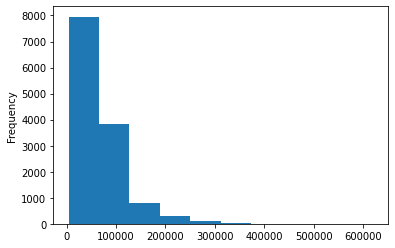

In [72]:
df2['item_offers_price'].plot.hist()

In [77]:
# Create custom bin for sales; convert continuous variables to range variables
bins = [0,20000,40000,60000,80000,100000,120000] 
labels = ['0_20k','20k_40k','40k_60k','60k_80k','80k_100k','100k_120k'] # bins name
df2['price_range'] = pd.cut(df2['item_offers_price'],bins,labels=labels,include_lowest=True)
df2['price_range'].value_counts()

C:\Users\ws\AppData\Local\Temp\ipykernel_13564\212475669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_range'] = pd.cut(df2['item_offers_price'],bins,labels=labels,include_lowest=True)


20k_40k      3600
40k_60k      2771
60k_80k      2183
80k_100k     1171
0_20k        1037
100k_120k     697
Name: price_range, dtype: int64

In [82]:
df3 = df2.groupby('price_range')['item_brand_name'].count().reset_index()

In [86]:
df3

,price_range,item_brand_name
0,0_20k,1037
1,20k_40k,3600
2,40k_60k,2771
3,60k_80k,2183
4,80k_100k,1171
5,100k_120k,697


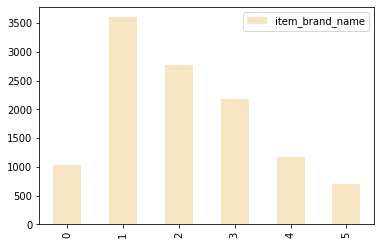

In [87]:
df3.plot(y='item_brand_name',kind='bar',alpha=0.8,color='wheat')
plt.show()